In [5]:
## 获取数据
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
data =  pd.read_table('julei.txt',sep='\t',engine="python",encoding = 'utf-8')
data.columns.values
data.head()

,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,67,99,11,10,1,74,71,90,738,111,...,52,65,71,22,79,15,64,42,8,8
1,76,98,6,15,2,69,69,84,494,97,...,44,81,99,37,65,17,61,46,6,3
2,67,88,7,26,12,32,44,50,516,83,...,38,44,62,44,47,20,61,46,7,3
3,71,96,5,15,4,82,82,103,473,105,...,45,71,99,39,71,4,62,37,8,9
4,75,88,7,9,12,38,47,55,523,89,...,32,13,36,15,65,9,62,37,4,3


In [6]:
data.shape #查看数据量

(43666, 24)

In [7]:
data.info() #查看数据的信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43666 entries, 0 to 43665
Data columns (total 24 columns):
age         43666 non-null int64
c210apvt    43666 non-null int64
c210b200    43666 non-null int64
c210blu     43666 non-null int64
c210bpvt    43666 non-null int64
c210cip     43666 non-null int64
c210ebi     43666 non-null int64
c210hmi     43666 non-null int64
c210hva     43666 non-null int64
c210kses    43666 non-null int64
c210mah     43666 non-null int64
c210mob     43666 non-null int64
c210mys     43666 non-null int64
c210pdv     43666 non-null int64
c210pmr     43666 non-null int64
c210poo     43666 non-null int64
c210psu     43666 non-null int64
c210pwc     43666 non-null int64
c210wht     43666 non-null int64
ilor        43666 non-null int64
meda        43666 non-null int64
pdpe        43666 non-null int64
tins        43666 non-null int64
zhip19      43666 non-null int64
dtypes: int64(24)
memory usage: 8.0 MB


In [8]:
#查看缺失值
na_num = pd.isna(data).sum()
print(na_num)
# 缺失值处理 -- 每列特征的均值填充缺失数据
#data2 = data.fillna(data.mean())
### 用每列特征的中位数填充缺失数据
#data.fillna(data.median())
#用相邻后面（back）特征填充前面空值，前一个则是ffill
#data.fillna(method='bfill')   

age         0
c210apvt    0
c210b200    0
c210blu     0
c210bpvt    0
c210cip     0
c210ebi     0
c210hmi     0
c210hva     0
c210kses    0
c210mah     0
c210mob     0
c210mys     0
c210pdv     0
c210pmr     0
c210poo     0
c210psu     0
c210pwc     0
c210wht     0
ilor        0
meda        0
pdpe        0
tins        0
zhip19      0
dtype: int64


In [9]:
#若存在将缺失值所在的行去除的情况，记得回复索引
#缺失值处理之后，索引恢复
for i in [data]:
    i.index = range(i.shape[0])
data.head()

,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,67,99,11,10,1,74,71,90,738,111,...,52,65,71,22,79,15,64,42,8,8
1,76,98,6,15,2,69,69,84,494,97,...,44,81,99,37,65,17,61,46,6,3
2,67,88,7,26,12,32,44,50,516,83,...,38,44,62,44,47,20,61,46,7,3
3,71,96,5,15,4,82,82,103,473,105,...,45,71,99,39,71,4,62,37,8,9
4,75,88,7,9,12,38,47,55,523,89,...,32,13,36,15,65,9,62,37,4,3


 标准化计算方式：(x-平均值)/方差，得到均值为0，标准差为1的分布，
  标准化之后的内容是数组型，需要转化为数据框 
  归一化：Xi = (Xi - min(Xi))  /  ( max(Xi) - min(Xi) )

In [10]:
# 标准化方法1：通过手动计算进行标准化
x = (data -data.mean())/data.std()
print(x.mean(),x.std())

age        -3.210458e-16
c210apvt    1.428786e-15
c210b200    4.743288e-16
c210blu     8.557662e-17
c210bpvt   -2.325844e-15
c210cip    -3.971820e-17
c210ebi     7.898332e-16
c210hmi    -7.636247e-17
c210hva     1.101678e-15
c210kses   -2.743801e-16
c210mah    -1.605113e-16
c210mob     1.490393e-14
c210mys    -2.702521e-15
c210pdv     1.162853e-16
c210pmr     1.358832e-16
c210poo     7.995075e-16
c210psu     8.397028e-15
c210pwc    -1.984796e-15
c210wht     3.804547e-16
ilor       -9.281982e-15
meda       -1.841746e-14
pdpe        1.842098e-14
tins        1.087992e-14
zhip19      1.957512e-15
dtype: float64 age         1.0
c210apvt    1.0
c210b200    1.0
c210blu     1.0
c210bpvt    1.0
c210cip     1.0
c210ebi     1.0
c210hmi     1.0
c210hva     1.0
c210kses    1.0
c210mah     1.0
c210mob     1.0
c210mys     1.0
c210pdv     1.0
c210pmr     1.0
c210poo     1.0
c210psu     1.0
c210pwc     1.0
c210wht     1.0
ilor        1.0
meda        1.0
pdpe        1.0
tins        1.0
zhip19      1.0
d

In [11]:
x.head() 

,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,-0.978578,0.914089,-0.240269,-0.943013,-0.939641,0.698806,0.666403,0.667372,1.755618,1.117072,...,0.560578,0.191035,0.096745,-0.943271,1.140208,-0.157253,0.839660,-1.02803,0.037856,1.162907
1,1.105637,0.824634,-0.557755,-0.441548,-0.846230,0.522702,0.579900,0.482368,0.737249,0.397379,...,-0.020659,0.832641,1.014751,0.310680,0.226454,-0.052946,0.648278,-0.72511,-0.523533,-0.455295
2,-0.978578,-0.069911,-0.494258,0.661675,0.087884,-0.780466,-0.501385,-0.565985,0.829069,-0.322314,...,-0.456586,-0.651073,-0.198328,0.895857,-0.948374,0.103514,0.648278,-0.72511,-0.242839,-0.455295
3,-0.052260,0.645725,-0.621252,-0.441548,-0.659407,0.980572,1.142169,1.068213,0.649602,0.808632,...,0.051996,0.431637,1.014751,0.477874,0.618063,-0.730940,0.712072,-1.40668,0.037856,1.486547
4,0.874058,-0.069911,-0.494258,-1.043306,0.087884,-0.569141,-0.371631,-0.411816,0.858285,-0.013874,...,-0.892514,-1.894186,-1.050763,-1.528448,0.226454,-0.470173,0.712072,-1.40668,-1.084922,-0.455295


In [12]:
#标准化方法2：通过preprocessing进行标准化，需要重新给列名
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data)
data_s = pd.DataFrame(scaler.fit_transform(data,y=data.columns)) 
data_s.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.978589,0.914099,-0.240272,-0.943023,-0.939652,0.698814,0.666411,0.667379,1.755638,1.117085,...,0.560585,0.191037,0.096746,-0.943282,1.140221,-0.157255,0.839670,-1.028041,0.037856,1.162920
1,1.105650,0.824644,-0.557761,-0.441553,-0.846239,0.522708,0.579907,0.482374,0.737257,0.397384,...,-0.020659,0.832651,1.014763,0.310684,0.226456,-0.052947,0.648286,-0.725118,-0.523539,-0.455300
2,-0.978589,-0.069912,-0.494263,0.661683,0.087885,-0.780475,-0.501391,-0.565992,0.829079,-0.322318,...,-0.456591,-0.651081,-0.198331,0.895868,-0.948385,0.103515,0.648286,-0.725118,-0.242842,-0.455300
3,-0.052261,0.645733,-0.621259,-0.441553,-0.659415,0.980584,1.142182,1.068225,0.649610,0.808641,...,0.051997,0.431642,1.014763,0.477879,0.618070,-0.730949,0.712080,-1.406696,0.037856,1.486564
4,0.874068,-0.069912,-0.494263,-1.043318,0.087885,-0.569148,-0.371635,-0.411820,0.858294,-0.013874,...,-0.892524,-1.894207,-1.050775,-1.528466,0.226456,-0.470179,0.712080,-1.406696,-1.084935,-0.455300


In [13]:
# 列名更新方法1：将原列名赋给当前列名 
new_col = data.columns
data_s.columns = new_col
data_s.head()

,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,-0.978589,0.914099,-0.240272,-0.943023,-0.939652,0.698814,0.666411,0.667379,1.755638,1.117085,...,0.560585,0.191037,0.096746,-0.943282,1.140221,-0.157255,0.839670,-1.028041,0.037856,1.162920
1,1.105650,0.824644,-0.557761,-0.441553,-0.846239,0.522708,0.579907,0.482374,0.737257,0.397384,...,-0.020659,0.832651,1.014763,0.310684,0.226456,-0.052947,0.648286,-0.725118,-0.523539,-0.455300
2,-0.978589,-0.069912,-0.494263,0.661683,0.087885,-0.780475,-0.501391,-0.565992,0.829079,-0.322318,...,-0.456591,-0.651081,-0.198331,0.895868,-0.948385,0.103515,0.648286,-0.725118,-0.242842,-0.455300
3,-0.052261,0.645733,-0.621259,-0.441553,-0.659415,0.980584,1.142182,1.068225,0.649610,0.808641,...,0.051997,0.431642,1.014763,0.477879,0.618070,-0.730949,0.712080,-1.406696,0.037856,1.486564
4,0.874068,-0.069912,-0.494263,-1.043318,0.087885,-0.569148,-0.371635,-0.411820,0.858294,-0.013874,...,-0.892524,-1.894207,-1.050775,-1.528466,0.226456,-0.470179,0.712080,-1.406696,-1.084935,-0.455300


In [ ]:
#列名更新方法2：列名写定
new_col = [...]
data_s.columns = new_col
data_s.head()

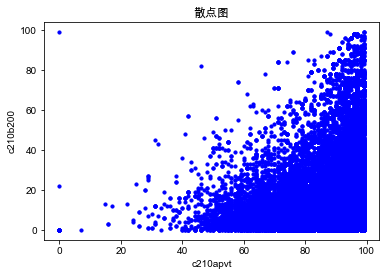

In [44]:
# 查看元数据散点图，判断可以聚类的趋势
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']     # win
plt.rcParams["font.family"] = 'Arial Unicode MS' # mac
plt.rcParams['axes.unicode_minus'] = False
plt.scatter(data['c210apvt'],data['c210b200'], s=10, c='b', ) #s标量 c颜色 
plt.xlabel('c210apvt') #添加x坐标标注
plt.ylabel('c210b200') #添加y坐标标注
plt.title("散点图")    #添加标题
plt.show()

<BarContainer object of 43666 artists>

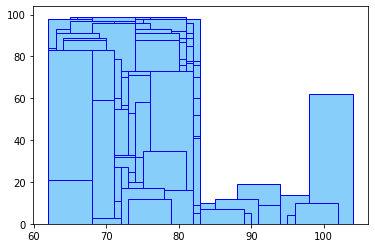

In [16]:
# 查看元数据条形图，数据太多了，看着不太方便
plt.bar(data['age'],data['c210b200'],width = 6,facecolor = 'lightskyblue',
        edgecolor = 'blue')  #edgecolor：条形图边界颜色

In [17]:
from sklearn.cluster import KMeans #引入kmeans的函数

最佳K值的确定：

肘部法：选择误差平方和突然变小的K值

轮廓系数：轮廓系数的值是介于[-1,1] ，越趋近于1代表内聚度和分离度都相对较优

 kmeans的误差平方和：在确定簇的过程中，点与中心的平方和

Text(0, 0.5, '$J(C_K)$')

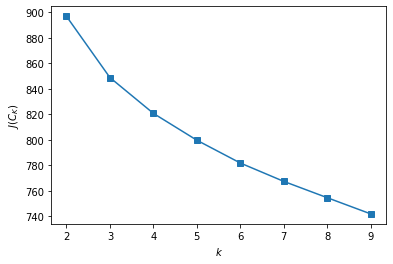

In [18]:
#  确定K值
inertia = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k,random_state = 1).fit(data_s)
    inertia.append(np.sqrt(kmeans.inertia_)) 
plt.plot(range(2,10),inertia,marker = 's')
plt.xlabel('$k$') #k值，加入$表示输出数学符号
plt.ylabel('$J(C_K)$')#误差平方和

Text(0, 0.5, 'J(C_K)')

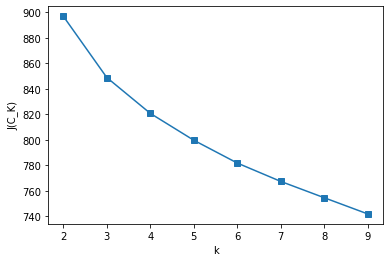

In [19]:
#  确定K值
inertia = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k,random_state = 1).fit(data_s)
    inertia.append(np.sqrt(kmeans.inertia_)) 
plt.plot(range(2,10),inertia,marker = 's')
plt.xlabel('k') #k值
plt.ylabel('J(C_K)')#误差平方和

轮廓系数（Silhouette Coefficient）结合了聚类的凝聚度和分离度，用于评估聚类的效果。该值处于-1~1之间，值越大，表示聚类效果越好。具体计算方法如下：

对于每个样本点i，计算点i与其同一个簇内的所有其他元素距离的平均值，记作a(i)，用于量化簇内的凝聚度。
选取i外的一个簇b，计算i与b中所有点的平均距离，遍历所有其他簇，找到最近的这个平均距离,记作b(i)，即为i的邻居类，用于量化簇之间分离度。
对于样本点i，轮廓系数s(i) = (b(i) – a(i))/max{a(i),b(i)}
计算所有i的轮廓系数，求出平均值即为当前聚类的整体轮廓系数，度量数据聚类的紧密程度
从上面的公式，不难发现若s(i)小于0，说明i与其簇内元素的平均距离小于最近的其他簇，表示聚类效果不好。如果a(i)趋于0，或者b(i)足够大，即a(i)<<b(i)，那么s(i)趋近与1，说明聚类效果比较好。

In [20]:
# 轮廓系数
from sklearn.metrics import silhouette_score  #引入判断标准，轮廓系数

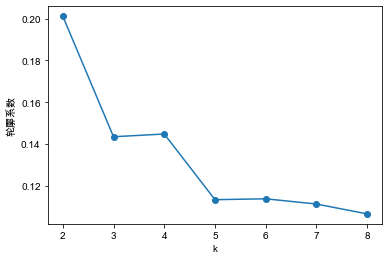

In [45]:
# 存放轮廓系数
Scores = []  
plt.rcParams['font.sans-serif'] = ['SimHei']     # win
plt.rcParams["font.family"] = 'Arial Unicode MS' # mac
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
for k in range(2, 9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(data_s)
    Scores.append(silhouette_score(data_s, estimator.labels_, metric='euclidean'))
X = range(2, 9)
plt.xlabel('k')
plt.ylabel('轮廓系数')
plt.plot(X, Scores, 'o-')
plt.show()

In [24]:
# 建立模型
cluster = KMeans(n_clusters = 3,random_state = 5).fit(data_s)

kmeans模型建立之后的值，模型.labels_可以得到标签值，模型.cluster_centers_可以得到聚类中心

In [25]:
# 聚类中心
centers = cluster.cluster_centers_ # 聚类中心
centers

array([[-0.0061091 ,  0.36947872,  0.11119133,  0.24248837, -0.37187264,
         0.17093037, -0.07236612, -0.09680095, -0.34326749, -0.2082043 ,
         0.20535841,  0.11576979, -0.22690735, -0.07579439,  0.2756444 ,
         0.39402009,  0.31751282, -0.08510273, -0.08339766, -0.0728242 ,
        -0.05766506,  0.17745683,  0.14832158,  0.04237579],
       [-0.02837654, -1.13424881, -0.239306  ,  0.51186082,  1.15550012,
        -1.17410953, -0.93888156, -0.92068372, -0.34891988, -0.84166391,
        -0.57032619,  0.03667427, -0.73734264,  0.76321194, -1.01364994,
        -1.02941392, -0.70978595,  0.2020597 , -0.86853412,  0.06109196,
         0.18921442, -0.21801227, -0.30245243, -0.25340351],
       [ 0.04410456,  0.67205887,  0.08270817, -1.0307275 , -0.69270071,
         1.07169924,  1.22859978,  1.25071536,  1.01897717,  1.35616984,
         0.30312797, -0.2487595 ,  1.2671973 , -0.75942016,  0.69756991,
         0.50561301,  0.26714775, -0.08544698,  1.1657929 ,  0.05787956,
  

In [26]:
# 样本聚类标签
c_preds = cluster.labels_ # 1.直接从建立好的模型中获取lable值，不需要调用接口
c_preds1 = cluster.fit_predict(data_s) #2.使用sklearn建模步骤的predict得到label值
print(c_preds)
print(c_preds1)

[2 0 1 ... 2 1 0]
[2 0 1 ... 2 1 0]


In [27]:
#查看各个类别的数据，是否比较均衡
unique_data = np.unique(c_preds) #查看不同的类别有几个
print(unique_data)
num = str(c_preds.tolist()).count("1") #将数组转化为列表，来进行计数
print( str(c_preds.tolist()).count("0"),str(c_preds.tolist()).count("1"),
      str(c_preds.tolist()).count("2"))

[0 1 2]
19658 12972 11036


In [28]:
c_preds.tolist()

[2,
 0,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 2,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 0,
 2,
 2,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 0,
 1,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 0,
 2,


In [29]:
# 查看总距离平方和 
inertia = cluster.inertia_
np.sqrt(inertia) # 均方误差 

848.8092637338119

In [30]:
# 轮廓系数均值
silhouette_score(data_s,c_preds)  

0.14350421332827396

In [32]:
#每个样本的轮廓系数
from sklearn.metrics import silhouette_samples 
silhouette_samples(data_s,c_preds)

array([ 0.15060802,  0.08771337, -0.01470462, ...,  0.26248703,
       -0.02803583,  0.1132832 ])

In [33]:
data_s.values[c_preds == 1] # 转化成数组

array([[-0.97858903, -0.06991159, -0.49426344, ..., -0.72511794,
        -0.24284154, -0.45530005],
       [ 0.87406789, -0.06991159, -0.49426344, ..., -1.40669575,
        -1.08493477, -0.45530005],
       [ 0.64248577, -2.48521113, -0.11327576, ..., -0.72511794,
         1.72204267, -0.77894413],
       ...,
       [-1.21017115, -1.85902236, -0.36726755, ..., -0.64938707,
        -1.36563251, -1.42623228],
       [-0.05226057, -1.50120021, -0.24027165, ..., -0.72511794,
        -0.52353928, -1.42623228],
       [ 0.87406789, -0.24882267,  0.14071602, ...,  2.07692416,
        -0.52353928,  0.1919881 ]])

In [34]:
data_s.values[:,0]

array([-0.97858903,  1.10565   , -0.97858903, ..., -1.44175327,
        0.87406789,  1.10565   ])

In [35]:
centers[:,0]  # 第一个维度下的中心

array([-0.0061091 , -0.02837654,  0.04410456])

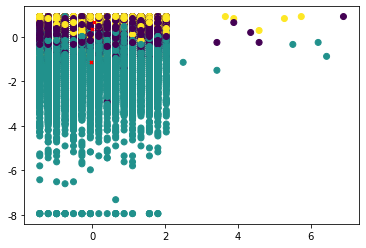

In [36]:
import matplotlib.pyplot as plt 
plt.figure()
plt.scatter(data_s.values[:, 0], data_s.values[:, 1], c=c_preds)#原始数据散点图，按照分类查看
plt.scatter(centers[:, 0], centers[:, 1],
            marker='x', s=10, linewidths=3,
            color='r')#重心红色X进行突出

In [37]:
# 将聚类后的值于原数据进行对比
from pandas.core.frame import DataFrame
c_preds = DataFrame(c_preds)
c_preds

,0
0,2
1,0
2,1
3,2
4,1
...,...
43661,0
43662,0
43663,2
43664,1


In [38]:
c_preds.rename(columns={0:'label'},inplace=True)
c_preds

,label
0,2
1,0
2,1
3,2
4,1
...,...
43661,0
43662,0
43663,2
43664,1


In [39]:
data_kmeans = pd.concat([data,c_preds],axis=1 )
data_kmeans.head()

,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,...,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19,label
0,67,99,11,10,1,74,71,90,738,111,...,65,71,22,79,15,64,42,8,8,2
1,76,98,6,15,2,69,69,84,494,97,...,81,99,37,65,17,61,46,6,3,0
2,67,88,7,26,12,32,44,50,516,83,...,44,62,44,47,20,61,46,7,3,1
3,71,96,5,15,4,82,82,103,473,105,...,71,99,39,71,4,62,37,8,9,2
4,75,88,7,9,12,38,47,55,523,89,...,13,36,15,65,9,62,37,4,3,1


In [40]:
# 导出为文件
import csv
outputpath='julei.csv'
data_kmeans.to_csv(outputpath,index=True,header=True)

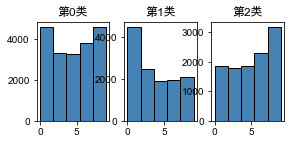

In [41]:
# 绘制子图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']     # win
plt.rcParams["font.family"] = 'Arial Unicode MS' # mac
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
fig = plt.figure()
for i in range(3):
    ax = fig.add_subplot(241+i)
    plt.hist(x = data_kmeans[data_kmeans.label==i].zhip19, # 指定绘图数据
             bins = 5, # 指定直方图中条块的个数
             color = 'steelblue', # 指定直方图的填充色
             edgecolor = 'black' # 指定直方图的边框色
            )
    ax.set_title('第'+str(i)+'类')
plt.show()

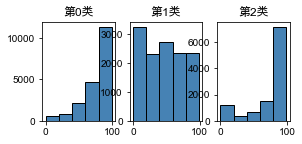

In [42]:
# 绘制子图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']     # win
plt.rcParams["font.family"] = 'Arial Unicode MS' # mac
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
fig = plt.figure()
for i in range(3):
    ax = fig.add_subplot(241+i)
    plt.hist(x = data_kmeans[data_kmeans.label==i].c210psu, # 指定绘图数据
             bins = 5, # 指定直方图中条块的个数
             color = 'steelblue', # 指定直方图的填充色
             edgecolor = 'black' # 指定直方图的边框色
            )
    ax.set_title('第'+str(i)+'类')
plt.show()